### Exercises

##### The end result of this exercise should be a file named prepare.py.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import prepare
import acquire

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('darkgrid')

##### Using your store items data:



In [2]:
#pull. data locally
df = pd.read_csv("all_combined.csv", index_col= 0)

In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


#### 1. Convert date column to datetime format.


In [4]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [5]:
df.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [6]:
#check for GMT
df.sale_date.str.endswith("00:00:00 GMT").sum()

913000

In [10]:
# we can get ride of GMT time as it is all same
df.sale_date = df.sale_date.str.replace("00:00:00 GMT","")
df.sale_date = df.sale_date.str.strip()

In [11]:
df.sale_date.sample(5)

115703    Tue, 28 Oct 2014
221348    Fri, 07 Feb 2014
525508    Sat, 17 Dec 2016
716954    Tue, 08 Mar 2016
524491    Thu, 06 Mar 2014
Name: sale_date, dtype: object

In [12]:
#now change it into datetime format
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
df.sale_date.head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: sale_date, dtype: datetime64[ns]

#### 2. Plot the distribution of sale_amount and item_price.

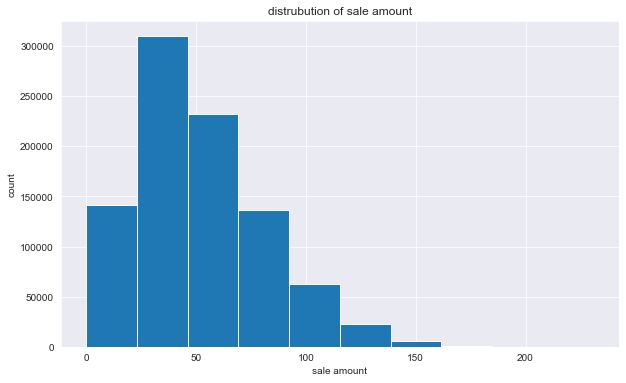

In [13]:
#visualise sale amount
df.sale_amount.hist()
plt.title("distrubution of sale amount")
plt.xlabel("sale amount")
plt.ylabel("count")
plt.show()

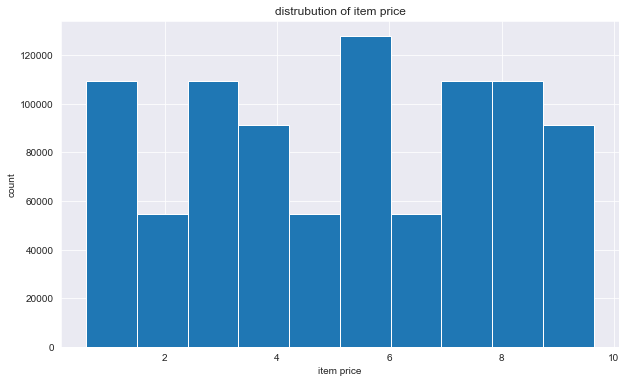

In [14]:
#visualise item price
df.item_price.hist()
plt.title("distrubution of item price")
plt.xlabel("item price")
plt.ylabel("count")
plt.show()

#### 3.Set the index to be the datetime variable.


In [15]:
#set date to index and sort
df = df.set_index('sale_date').sort_index()

In [16]:
df.head(3)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217


#### 4. Add a 'month' and 'day of week' column to your dataframe.


In [17]:
#create month and day of week column
df["month"] = df.index.month_name()
df["day_of_week"] = df.index.day_name()

In [18]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday


#### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [20]:
#create new column sales total that is product of sale amount and unit price
df["sales_total"] = df.sale_amount * df.item_price

In [21]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


#### 6. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [ ]:
def store_items():
    #pull. data locally
    df = pd.read_csv("all_combined.csv", index_col= 0)
    # we can get ride of GMT time as it is all same
    df.sale_date = df.sale_date.str.replace("00:00:00 GMT","")
    df.sale_date = df.sale_date.str.strip()
    #now change it into datetime format
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    #set date to index and sort
    df = df.set_index('sale_date').sort_index()
    #create month and day of week column
    df["month"] = df.index.month_name()
    df["day_of_week"] = df.index.day_name()
    
    return df

In [4]:
#check function from prepare.py 
df1 = prepare.store_items()

In [5]:
df1.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday


#### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



In [7]:
#pull data from acquire
df = acquire.get_opsd_data()

In [8]:
#check head
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [10]:
df.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

#### 1. Convert date column to datetime format.


In [12]:
#convert object date into datetime64
df.Date = pd.to_datetime(df.Date)

In [15]:
#check the conversion
df.Date.head(1)

0   2006-01-01
Name: Date, dtype: datetime64[ns]

#### 2. Plot the distribution of each of your variables.


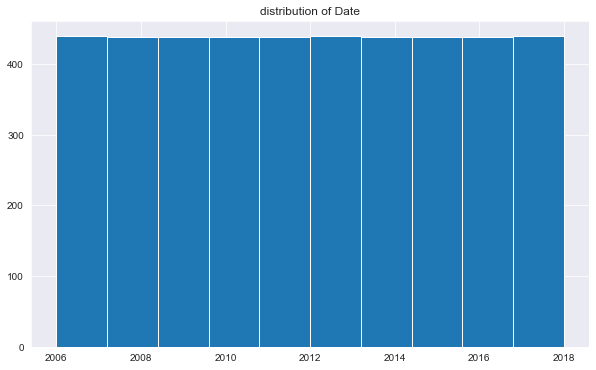

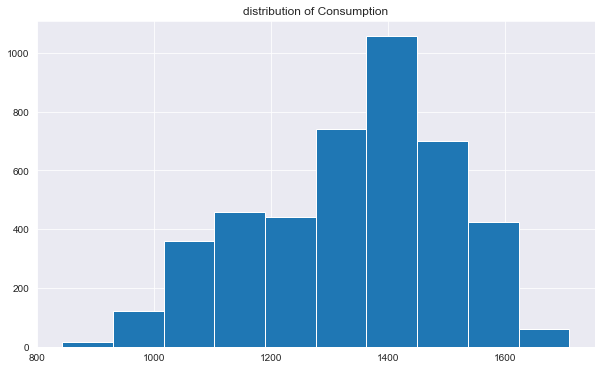

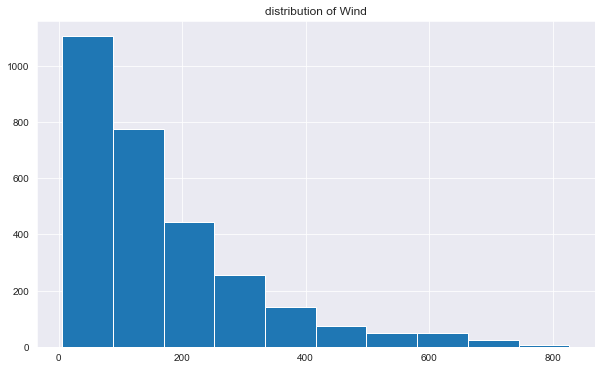

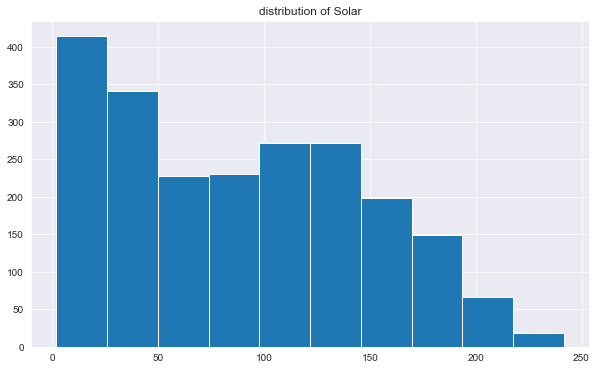

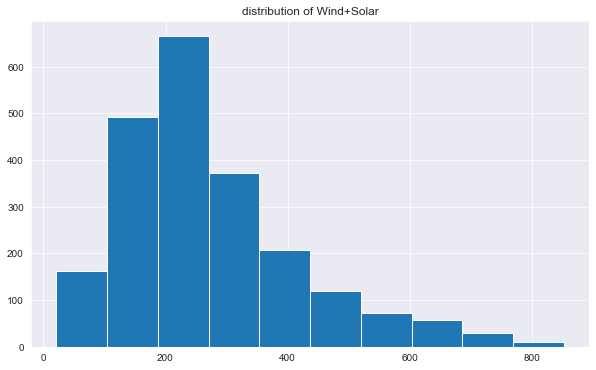

In [25]:
for cols in df.columns:
    df[cols].hist()
    plt.title("distribution of " + cols)
    plt.show()

#### 3. Set the index to be the datetime variable.


In [26]:
df = df.set_index("Date").sort_index()

In [27]:
df.head(1)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN


#### 4. Add a month and a year column to your dataframe.


In [28]:
df["month"] = df.index.month_name()
df["year"] = df.index.year

In [30]:
df.head(1)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006


#### 5. Fill any missing values.


In [31]:
df.Wind.value_counts(dropna = False)

NaN        1463
31.469        2
96.107        2
229.770       2
34.973        2
           ... 
35.317        1
19.479        1
33.386        1
64.503        1
721.176       1
Name: Wind, Length: 2914, dtype: int64

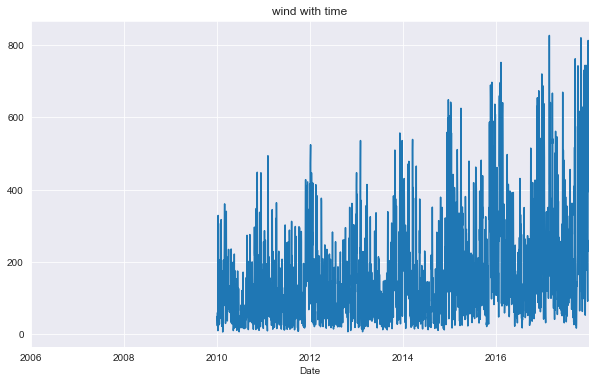

In [51]:
#plot wind pattern
df.Wind.plot(title = "wind with time")
plt.show()

there is no data from 2006 to 2010 so we will add 0 for null


In [52]:
#Fill null with 0
df.Wind = df.Wind.fillna(0)

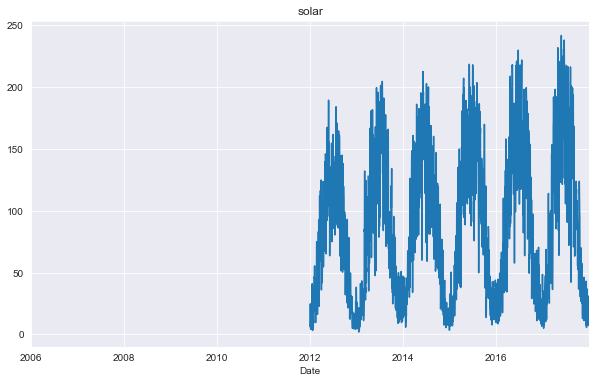

In [56]:
#null values for solar
df.Solar.plot(title = "solar")
plt.show()

there is no data from 2006 to 2012, we will fill it with 0

In [57]:
#fill null with 0
df.Solar= df.Solar.fillna(0)

In [59]:
#null values at wind+solar

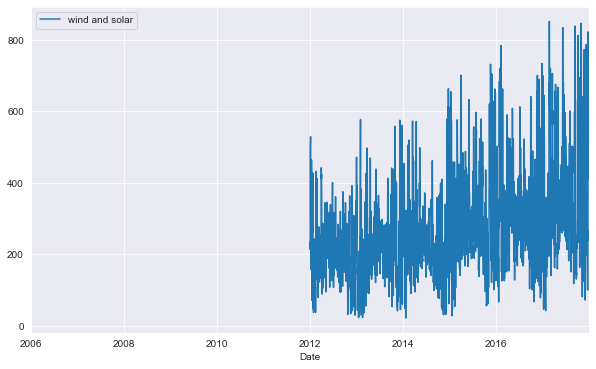

In [62]:
#visualise
df["Wind+Solar"].plot(label ="wind and solar")
plt.legend()
plt.show()

In [ ]:
#we have no data from 2006 from 2012m we will fill it with 0

In [63]:
#fill null
df["Wind+Solar"] = df["Wind+Solar"].fillna(0)

#### 6 Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [4]:
def opsd_data():
    #pull data from acquire
    df = acquire.get_opsd_data()
    #convert object date into datetime64
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()
    df["month"] = df.index.month_name()
    df["year"] = df.index.year
    df.Wind = df.Wind.fillna(0)
    df.Solar= df.Solar.fillna(0)
    df["Wind+Solar"] = df["Wind+Solar"].fillna(0)
    
    return df

In [5]:
#check the function
df1 = opsd_data()

In [6]:
df1.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
